# Importing Classical Libraries

In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns
import numpy as np
import pandas as pd
import time
import pylatexenc

# Importing Quantum Computing Libraries

In [3]:
from qiskit.circuit.library import TwoLocal, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms import VQC, QSVC
from qiskit.primitives import Sampler
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel


## Loading Dataset using pandas library

In [4]:
df=pd.read_csv('taiwan_data.csv')

## Label Encoding
### What is Label Encoding?
Label encoding converts categorical values into numerical values, allowing machine learning models to process them.


In [5]:
# Create a LabelEncoder object
le = LabelEncoder()

# Apply label encoding to categorical columns
for col in df.select_dtypes(include=['object']).columns:
  df[col] = le.fit_transform(df[col])

# Display the updated DataFrame
df.head(5)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


# Scaling The Dataset

In [6]:
# Create a Standard Scalar object
scalar = StandardScaler()

# Scale non-target columns
for col in df.columns:
    if col != 'Bankrupt?':
        df[col] = StandardScaler().fit_transform(df[[col]])

# Splitting dataset into test and train groups

In [7]:
X=df.drop('Bankrupt?',axis=1)
y=df['Bankrupt?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)

# Classical Machine Learning Models Implementation

In [8]:
models = [

    SVC(),
    RandomForestClassifier(),
]

for model in models:
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(f"Model: {model.__class__.__name__}, Score: {score}")

Model: SVC, Score: 0.9659824046920821
Model: RandomForestClassifier, Score: 0.9683284457478006


# Plotting The Confusion Matrix

In [9]:
import matplotlib.pyplot as plt


models = [
    
    SVC(),
    RandomForestClassifier(),
]

for model in models:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred)

  print(f"Model: {model.__class__.__name__}")
  print(f"  Accuracy: {accuracy:.4f}")
  print(f"  F1 Score: {f1:.4f}")
  print(f"  Precision: {precision:.4f}")
  print(f"  Recall: {recall:.4f}")
  print("-" * 20)



Model: SVC
  Accuracy: 0.9660
  F1 Score: 0.0333
  Precision: 1.0000
  Recall: 0.0169
--------------------
Model: RandomForestClassifier
  Accuracy: 0.9677
  F1 Score: 0.2857
  Precision: 0.6111
  Recall: 0.1864
--------------------


# Data Preparation For Quantum Processing

To prepare my dataset for Quantum Machine Learning, I reduced both the feature space and training example size. <br>
For feature reduction, I employed two methods: <br> correlation-based and Principal Component Analysis (PCA)-based. <br>The correlation-based approach removed features with a correlation coefficient less than 0.2, while PCA retained 95% of the explained variance. Next, I used StratifiedShuffleSplit to randomly reduce the training examples, ensuring the class balance was maintained. Finally, I standardized the data using StandardScaler to ensure compatibility with Quantum Machine Learning algorithms. The resulting datasets, reduced using correlation and PCA methods, were then ready for input into the Quantum Machine Learning model.

In [10]:
dfq=df.copy()

# Feature Reduction

# 1. Correlation Method

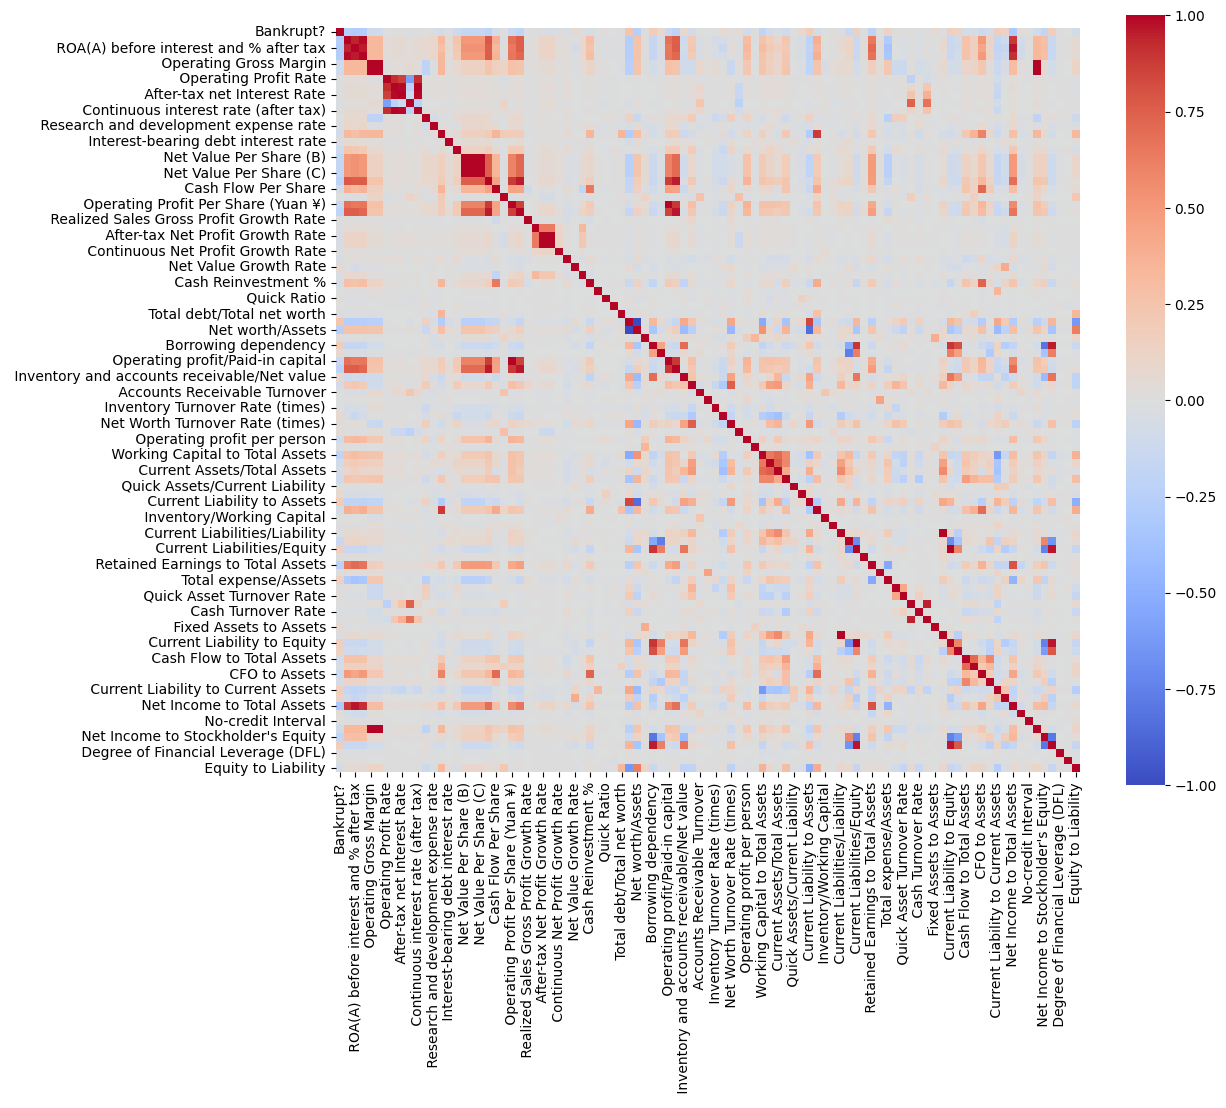

In [11]:
corr_matrix = dfq.corr()
# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True)
plt.show()

# Calculate correlation with target


In [12]:
# Calculate correlation matrix
correlation_matrix = dfq.corr()

# Get correlations with target variable 'Bankrupt?'
target_correlations = correlation_matrix['Bankrupt?'].abs()

# Filter columns with correlation < 0.5
columns_to_drop = target_correlations[target_correlations < 0.2].index
columns_to_drop = columns_to_drop[columns_to_drop != 'Bankrupt?']  # exclude target variable

# Drop columns
dfq_filtered_corr = dfq.drop(columns=columns_to_drop)

print(f"Dropped columns: {list(columns_to_drop)}")
print(f"Remaining columns: {dfq_filtered_corr.columns}")

print(f"Number of remaining columns: {len(dfq_filtered_corr.columns)}")

Dropped columns: [' Operating Gross Margin', ' Realized Sales Gross Margin', ' Operating Profit Rate', ' Pre-tax net Interest Rate', ' After-tax net Interest Rate', ' Non-industry income and expenditure/revenue', ' Continuous interest rate (after tax)', ' Operating Expense Rate', ' Research and development expense rate', ' Cash flow rate', ' Interest-bearing debt interest rate', ' Tax rate (A)', ' Net Value Per Share (B)', ' Net Value Per Share (A)', ' Net Value Per Share (C)', ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)', ' Operating Profit Per Share (Yuan ¥)', ' Realized Sales Gross Profit Growth Rate', ' Operating Profit Growth Rate', ' After-tax Net Profit Growth Rate', ' Regular Net Profit Growth Rate', ' Continuous Net Profit Growth Rate', ' Total Asset Growth Rate', ' Net Value Growth Rate', ' Total Asset Return Growth Rate Ratio', ' Cash Reinvestment %', ' Current Ratio', ' Quick Ratio', ' Interest Expense Ratio', ' Total debt/Total net worth', ' Long-term fund suitabi

In [13]:
dfq_filtered_corr

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Debt ratio %,Net worth/Assets,Net profit before tax/Paid-in capital,Retained Earnings to Total Assets,Net Income to Total Assets
0,1,-2.217909,-2.045798,-2.400361,-1.794106,-1.375150,1.750845,-1.750845,-1.460495,-1.232594,-2.254317
1,1,-0.673828,-0.311068,-0.598450,-0.597379,-0.435312,1.075727,-1.075727,-0.446793,-0.143474,-0.309033
2,1,-1.303672,-0.908420,-1.319910,-1.450153,-1.252562,1.749724,-1.749724,-1.126595,-0.971327,-0.820510
3,1,-1.735886,-1.636209,-1.556340,-1.055034,-1.077762,0.710131,-0.710131,-1.142029,-1.088734,-1.691222
4,1,-0.661778,-0.307745,-0.508050,-0.489361,-0.480715,-0.123674,0.123674,-0.495543,-0.816926,-0.316008
...,...,...,...,...,...,...,...,...,...,...,...
6814,0,-0.189395,-0.291959,-0.168181,-0.367130,-0.369478,0.212203,-0.212203,-0.376975,-0.356845,-0.194231
6815,0,-0.494676,-0.310237,-0.477627,-0.364287,-0.349046,-0.258249,0.258249,-0.354438,-0.082288,-0.198659
6816,0,-0.534845,-0.379194,-0.534996,-0.537684,-0.335426,-1.376904,1.376904,-0.338760,-0.106889,-0.247517
6817,0,0.017875,0.019594,0.007403,-0.014649,0.036878,-0.485905,0.485905,-0.007065,0.190903,0.100366


### dfq_filtered_corr: 
it is a filtered quantum dataset resulting from correlation-based feature reduction. This dataset:
* Retains only the most relevant features with correlation coefficients below 0.8
* Maintains the original class balance and label information
* Has undergone standardization for compatibility with Quantum Machine Learning algorithms
* Serves as input for Quantum Machine Learning models, enabling efficient processing and analysis
#### Characteristics
* Reduced feature space
* Standardized data
* Balanced class distribution
* Optimized for Quantum Machine Learning computations

# 2.**Principal Component Analysis (PCA)**: 
### Select top k principal components explaining most of the variance.


In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)  # retain 95% of variance
dfq_filtered_pca = pca.fit_transform(dfq.drop(['Bankrupt?'], axis=1))

In [15]:
dfq_filtered_pca

array([[-7.33829438,  0.37329441, -0.30901366],
       [-2.70371311, -0.98634639, -2.15561702],
       [-4.30705861, -0.40470004, -0.30980105],
       ...,
       [ 1.91030785, -1.69378647, -1.40977816],
       [ 1.85426122, -0.39792285, -0.48864038],
       [ 1.23594199, -2.32944793, -0.46675743]])

### dfq_filtered_pca 
it is a filtered quantum dataset resulting from Principal Component Analysis (PCA)-based dimensionality reduction. This dataset:
* Retains 95% of the explained variance in the original data
* Transforms high-dimensional features into lower-dimensional principal components
* Maintains the original class balance and label information
* Has undergone standardization for compatibility with Quantum Machine Learning algorithms
#### Characteristics
* Reduced dimensionality
* Optimized feature representation
* Retained essential information
* Enhanced computational efficiency for Quantum Machine Learning tasks

In [16]:
dfq_filtered_pca.size

20457

In [17]:
# Convert array to DataFrame
dfq_filtered_pca = pd.DataFrame(dfq_filtered_pca)

In [18]:
# Add 'Bankrupt?' column
dfq_filtered_pca['Bankrupt?'] = dfq['Bankrupt?']


In [19]:
dfq_filtered_pca

,0,1,2,Bankrupt?
0,-7.338294,0.373294,-0.309014,1
1,-2.703713,-0.986346,-2.155617,1
2,-4.307059,-0.404700,-0.309801,1
3,-5.830736,-1.385669,-1.301105,1
4,-2.343197,-0.201748,0.806267,1
...,...,...,...,...
6814,-1.177758,-0.508512,0.189843,0
6815,-1.282275,-0.663230,0.247693,0
6816,1.910308,-1.693786,-1.409778,0
6817,1.854261,-0.397923,-0.488640,0


# Reducing Samples

# Sample Reduction of Correlation Based Data Set

In [20]:
from sklearn.utils import resample

# Define sample size
sample_size = 200

# Stratified sampling (maintaining class balance)
dfq_sampled_corr = pd.concat([resample(dfq_filtered_corr[dfq_filtered_corr['Bankrupt?'] == c], replace=False, n_samples=int(sample_size * len(dfq_filtered_corr[dfq_filtered_corr['Bankrupt?'] == c]) / len(dfq_filtered_corr))) for c in dfq_filtered_corr['Bankrupt?'].unique()])

In [21]:
dfq_sampled_corr

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Persistent EPS in the Last Four Seasons,Per Share Net profit before tax (Yuan ¥),Debt ratio %,Net worth/Assets,Net profit before tax/Paid-in capital,Retained Earnings to Total Assets,Net Income to Total Assets
2041,1,-0.638480,-0.354270,-0.561073,-0.412611,-0.412610,1.238899,-1.238899,-0.423765,0.024529,-0.271947
1872,1,-1.616987,-1.462570,-1.506794,-1.737254,-1.554491,1.606177,-1.606177,-1.641285,-0.832441,-1.490010
1179,1,-2.379387,-2.411354,-2.524661,-1.882226,-1.538600,0.843585,-0.843585,-1.638836,-2.122059,-2.644554
3303,1,-3.740299,-4.046387,-4.027557,-1.637764,-1.522709,0.165663,-0.165663,-1.476418,-3.411989,-5.021928
6642,1,-2.721624,-3.261272,-2.814983,-2.240391,-2.353581,2.890808,-2.890808,-2.491589,-2.162874,-4.115023
...,...,...,...,...,...,...,...,...,...,...,...
2875,0,0.413938,0.691719,0.581963,0.380470,0.207138,-0.698421,0.698421,0.233009,0.507137,0.762515
3889,0,1.042175,0.314532,0.941824,0.113267,0.000555,-1.292795,1.292795,0.016452,0.264874,0.460496
1383,0,-0.466558,-0.140752,-0.255104,-0.418296,-0.507956,1.181144,-1.181144,-0.522245,-0.059984,-0.188857
5226,0,0.034746,0.054488,0.055210,-0.145408,-0.196947,0.242483,-0.242483,-0.189326,-0.027421,0.132307


# Sample Reduction of PCA Based Data Set

In [22]:

# Define sample size
sample_size = 200

# Stratified sampling (maintaining class balance)
dfq_sampled_pca = pd.concat([resample(dfq_filtered_pca[dfq_filtered_pca['Bankrupt?'] == c], replace=False, n_samples=int(sample_size * len(dfq_filtered_pca[dfq_filtered_pca['Bankrupt?'] == c]) / len(dfq_filtered_pca))) for c in dfq_filtered_pca['Bankrupt?'].unique()])

In [23]:
dfq_sampled_pca

,0,1,2,Bankrupt?
4788,-5.163704,-0.437420,-0.211589,1
645,-2.241708,-0.073709,-1.319318,1
5069,-8.052857,-1.772223,-1.010785,1
4918,-16.065857,2.595601,2.864063,1
233,-2.475455,-1.355050,-2.578545,1
...,...,...,...,...
1202,-1.229777,1.130245,1.628640,0
6522,7.895189,-0.063395,-1.911023,0
2254,-0.743808,-0.799888,-0.151239,0
4387,-4.708675,-1.845217,0.879746,0


# Splitting of Data Sets into Test and Train Samples

In [24]:
# Training and Testing for Corr Based Data
X=dfq_sampled_corr.drop('Bankrupt?',axis=1)
y=dfq_sampled_corr['Bankrupt?']
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y, test_size=0.20, random_state=40)

# Training and Testing of PCA based Data
X_pca=dfq_sampled_pca.drop('Bankrupt?',axis=1)
y_pca=dfq_sampled_pca['Bankrupt?']
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_pca, y_pca, test_size=0.20, random_state=40)

# Feature Maps

# Featue Map For Corr Based Data

In [25]:
feature_dim = X_train_c.shape[1]

feature_map_c = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement="linear")

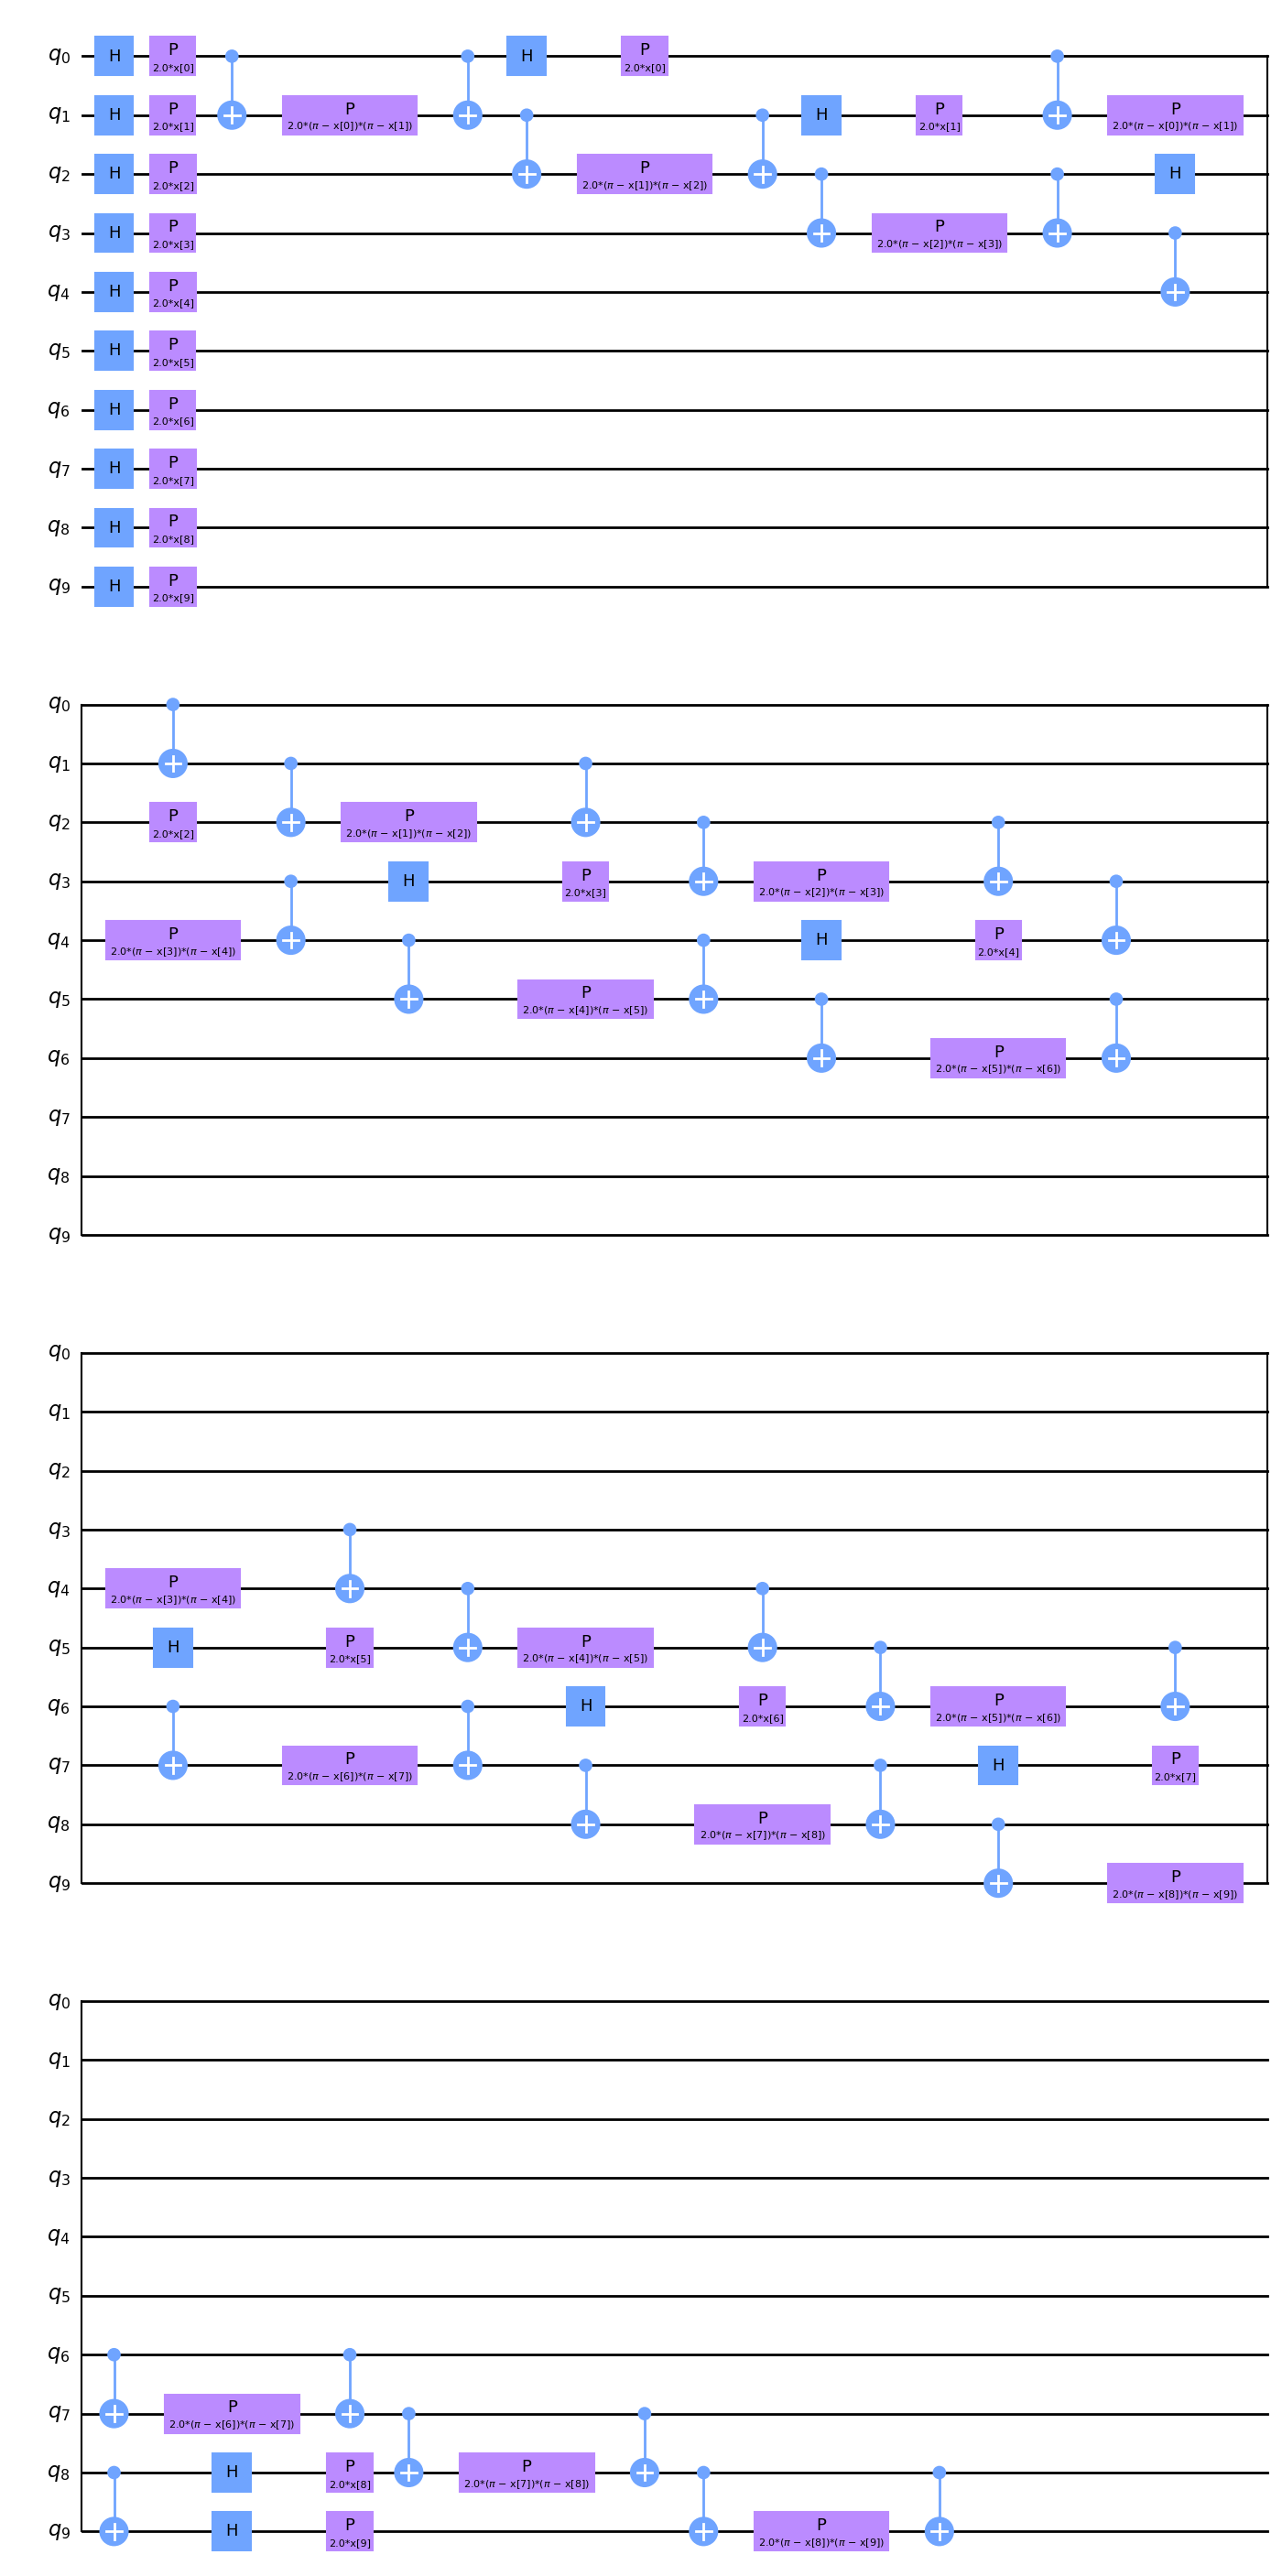

In [26]:
feature_map_c.decompose().draw(output="mpl", style="clifford", fold=20)

# Featue Map For PCA Based Data

In [27]:
feature_dim = X_train_p.shape[1]

feature_map_p = ZZFeatureMap(feature_dimension=feature_dim, reps=2, entanglement="linear")

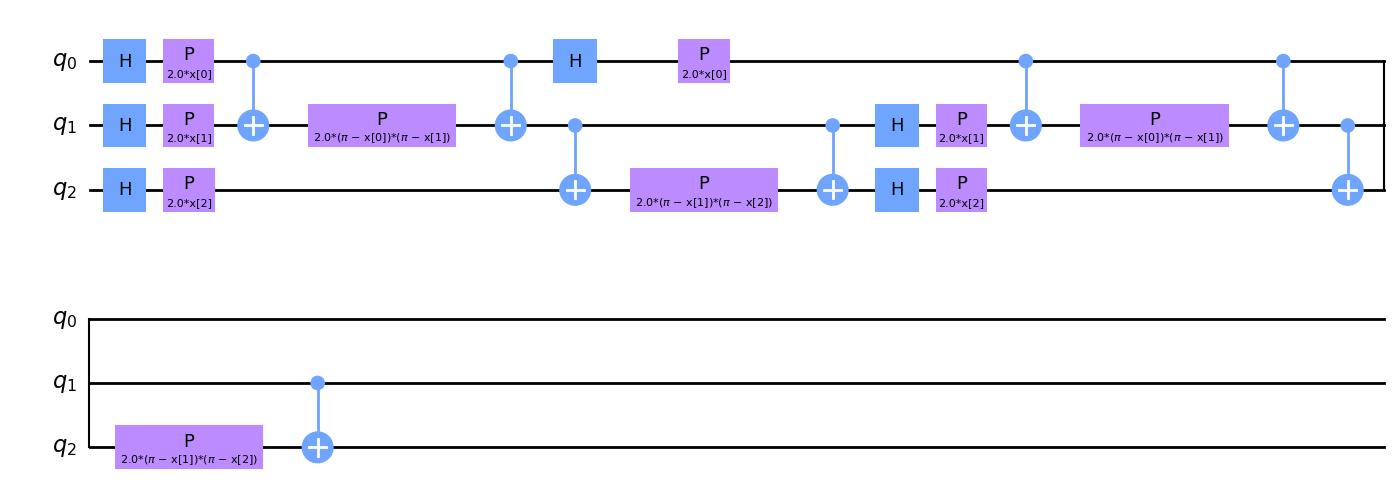

In [28]:
feature_map_p.decompose().draw(output="mpl", style="clifford", fold=20)

Setting Quantum Kernels for Correlation-Based and PCA-Based Data
====================================================================
Quantum Kernel for Correlation-Based Data
-----------------------------------------------
Description:<br>
I configured the Quantum Kernel for the correlation-based filtered dataset (dfq_filtered_corr).
##### Parameters
* kernel_name: QuantumKernelCorr
* dataset: dfq_filtered_corr
* feature_dimension: Number of features in dfq_filtered_corr


# Setting Up Quantum Kernel

In [29]:
from qiskit.primitives import Sampler
sampler=Sampler()

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_8304\2810157668.py:2: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler=Sampler()


# Quantum Kernel (Correlation Based Data)

In [30]:
fidelity = ComputeUncompute(sampler=sampler)
q_kernel_corr = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map_c)

# Quantum Kernel (PCA Based Data)

In [31]:
q_kernel_pca = FidelityQuantumKernel(fidelity=fidelity, feature_map=feature_map_p)

# Implementation of Quantum Computing Models


## Model No 01 VQC

### Data Pre Processing for VQC

In [32]:
# Data Set C
training_features_c = X_train_c.values
training_labels_c = y_train_c.values
test_features_c = X_test_c.values
test_labels_c = y_test_c.values

# Data Set P
training_features_p = X_train_p.values
training_labels_p = y_train_p.values
test_features_p = X_test_p.values
test_labels_p = y_test_p.values

## Ansatz Setting

In [33]:
ansatz_c = TwoLocal(feature_map_c.num_qubits, ["ry", "rz"], "cz", reps=3)
ansatz_p = TwoLocal(feature_map_p.num_qubits, ["ry", "rz"], "cz", reps=3)

In [34]:
optimizer = COBYLA(maxiter=50)
sampler = Sampler()
from IPython.display import clear_output

objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(Iights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

C:\Users\SURFACE\AppData\Local\Temp\ipykernel_8304\717335911.py:2: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


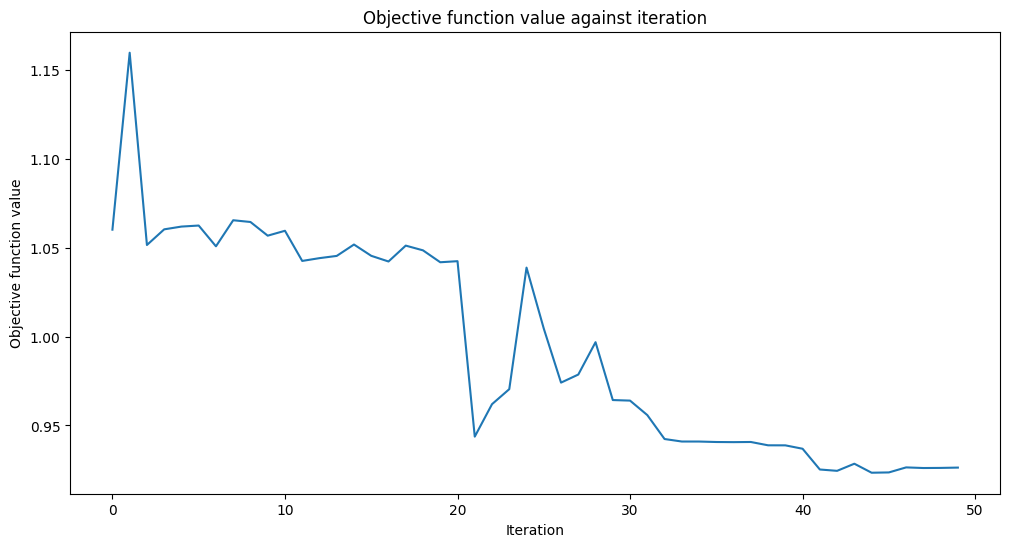

Training time: 609 seconds
Testing accuracy on Correlation Based Data: 0.97


In [35]:
vqc_c = VQC(
    sampler=sampler,
    feature_map=feature_map_c,
    ansatz=ansatz_c,
    optimizer=optimizer,
    callback=callback_graph,
)


# clear objective value history
objective_func_vals = []

start = time.time()
vqc_c.fit(training_features_c, training_labels_c)

elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")
score_c = vqc_c.score(test_features_c, test_labels_c)

print(f"Testing accuracy on Correlation Based Data: {score:0.2f}")

In [36]:
training_predictions = vqc_c.predict(training_features_c)
training_accuracy = accuracy_score(training_labels_c, training_predictions)
training_f1 = f1_score(training_labels_c, training_predictions)
training_recall = recall_score(training_labels_c, training_predictions)


print(f"Training accuracy on Correlation Based Data: {training_accuracy:0.2f}")
print(f"Training F1 score on Correlation Based Data: {training_f1:0.2f}")
print(f"Training Recall on Correlation Based Data: {training_recall:0.2f}")

Training accuracy on Correlation Based Data: 0.69
Training F1 score on Correlation Based Data: 0.07
Training Recall on Correlation Based Data: 0.40


# Model No 2 
# QSVC on Corr Based and PCA Based Kernel

In [37]:
qsvc = QSVC(
    quantum_kernel=q_kernel_corr
)
start = time.time()
qsvc.fit(X_train_c, y_train_c)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

qsvc_score = qsvc.score(X_test_c, y_test_c)

print(f"QSVC classification test score: {qsvc_score}")

Training time: 581 seconds
QSVC classification test score: 0.975


In [38]:
y_pred_c = qsvc.predict(X_test_c)

accuracy = accuracy_score(y_test_c, y_pred_c)
f1 = f1_score(y_test_c, y_pred_c)
precision = precision_score(y_test_c, y_pred_c)
recall = recall_score(y_test_c, y_pred_c)

print(f"Model: QSVC on Correlation Based Data")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")

Model: QSVC on Correlation Based Data
  Accuracy: 0.9750
  F1 Score: 0.0000
  Precision: 0.0000
  Recall: 0.0000


c:\Users\SURFACE\Downloads\Classical Implementation (PCA _ SVM)\2. African Economic Crises prediction\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [41]:
import time
qsvc_PCA = QSVC(
    quantum_kernel=q_kernel_pca
)
start = time.time()
qsvc_PCA.fit(X_train_p, y_train_p)
elapsed = time.time() - start

print(f"Training time: {round(elapsed)} seconds")

qsvc_score = qsvc_PCA.score(X_test_p, y_test_p)

print(f"QSVC classification test score: {qsvc_score}")

Training time: 61 seconds
QSVC classification test score: 0.975


In [42]:
y_pred_p = qsvc_PCA.predict(X_test_p)

accuracy = accuracy_score(y_test_p, y_pred_p)
f1 = f1_score(y_test_p, y_pred_p)
precision = precision_score(y_test_p, y_pred_p)
recall = recall_score(y_test_p, y_pred_p)

print(f"Model: QSVC on Correlation Based Data")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  Precision: {precision:.4f}")
print(f"  Recall: {recall:.4f}")

Model: QSVC on Correlation Based Data
  Accuracy: 0.9750
  F1 Score: 0.0000
  Precision: 0.0000
  Recall: 0.0000


c:\Users\SURFACE\Downloads\Classical Implementation (PCA _ SVM)\2. African Economic Crises prediction\myenv\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [43]:
# Evaluate training matrix
matrix_train = q_kernel_pca.evaluate(X_train_p)

# Evaluate testing matrix
matrix_test = q_kernel_pca.evaluate(X_test_p, X_train_p)

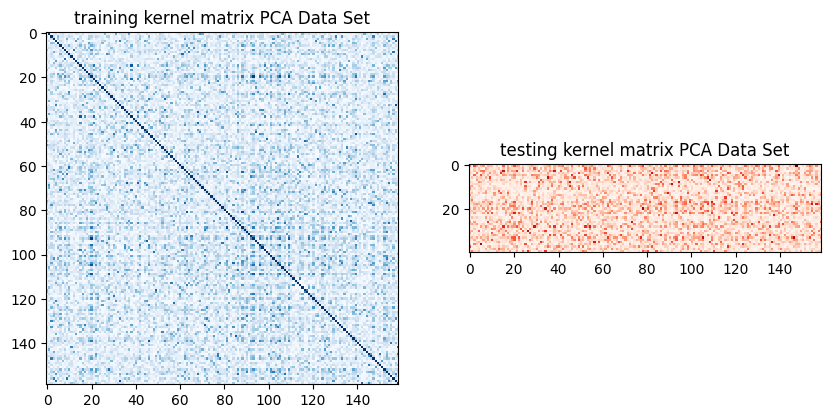

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(
    np.asmatrix(matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("training kernel matrix PCA Data Set")

axs[1].imshow(np.asmatrix(matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("testing kernel matrix PCA Data Set")

plt.show()

In [52]:
import platform
import psutil

# System Information
print("System Information:")
print(f"Platform: {platform.platform()}")
print(f"Processor: {platform.processor()}")
print(f"Operating System: {platform.system()}")
print(f"RAM: {psutil.virtual_memory().total / (1024.0 ** 3):.2f} GB")

# Memory Usage
print("\nMemory Usage:")
print(f"Current Memory Usage: {psutil.virtual_memory().percent}%")
print(f"Available Memory: {psutil.virtual_memory().available / (1024.0 ** 3):.2f} GB")

# Data Processing Metrics
print("\nData Processing Metrics:")
print(f"CPU Usage: {psutil.cpu_percent()}%")
print(f"Number of CPU Cores: {psutil.cpu_count()}")

System Information:
Platform: Windows-11-10.0.22000-SP0
Processor: Intel64 Family 6 Model 78 Stepping 3, GenuineIntel
Operating System: Windows
RAM: 7.92 GB

Memory Usage:
Current Memory Usage: 70.2%
Available Memory: 2.36 GB

Data Processing Metrics:
CPU Usage: 48.9%
Number of CPU Cores: 4
